# 1. Классификация задач машинного и глубокого обучения

![](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/6158dd5a5c04109f63363e0a_67KbBrP_mJMkcaOsEOlrk5eedzXJolEg5wkJX8nQLiarNAClBP0q5XncPyQM7jyoGKUGsc_onAJnBkVDfEkKVWIFNuZYZmaWq1hkP1fIQwX4nQMoDulaNYCkJvVgHr6IZOYdc5rv%3Ds0.png)

# Supervised Learning (Обучение с учителем)

![](https://miro.medium.com/v2/resize:fit:1400/1*ASYpFfDh7XnreU-ygqXonw.png)

## Пример классификации

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


name_of_dataset = "SpeedDating"
data = fetch_openml(name=name_of_dataset, version=1)

In [ ]:
print(data.DESCR)

In [ ]:
data.data.head()

In [ ]:
data.target.hist();

## Пример регрессии

In [ ]:
data_url = "https://raw.githubusercontent.com/Pratik-Bhujade/Diamond-Dataset/master/DiamondData.csv"
data = pd.read_csv(data_url)

[data description](https://www.kaggle.com/datasets/shivam2503/diamonds)

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data["price"].nunique()

In [ ]:
data["price"].hist();

## Пример кластеризации

In [ ]:
data_url = "https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv"
data = pd.read_csv(data_url)

In [ ]:
data.head()

In [ ]:
data.drop(['CustomerID'], axis=1, inplace=True)
data['Gender'] = data['Gender'].replace({"Male": 0, "Female": 1})

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE()
data_tsne = tsne.fit_transform(data)

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(data_tsne[:, 0], data_tsne[:, 1]);

In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=6)
kmeans.fit(data)
y_pred = kmeans.predict(data)

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=y_pred, s=30);

# 2. Важные понятия в машинном обучении

In [ ]:
import numpy as np

In [ ]:
RANDOM_STATE = 17
SAMPLE_SIZE = 30
NOISE_AMPLITUDE = 5

np.random.seed(RANDOM_STATE)
X = np.arange(0, SAMPLE_SIZE)
y = 2 * X + np.random.randint(-NOISE_AMPLITUDE, NOISE_AMPLITUDE, size=SAMPLE_SIZE) + 30

In [ ]:
data = pd.read_csv("../../data/SOCR-HeightWeight.csv")
data.head()

In [ ]:
data.drop(['Index'], axis=1, inplace=True)
data.columns = ['height', 'weight']
data.head()

In [ ]:
data['height'] = data['height'] * 2.54 
data['weight'] = data['weight'] * 0.453592

In [ ]:
data.shape

In [ ]:
plt.scatter(data['height'], data['weight'], s=0.5)
plt.ylabel('Вес, кг')
plt.xlabel('Рост, см')
plt.title('Зависимость веса от роста');

Представим зависимость веса от роста как линейную:  
$$ y = kx + b $$ 
$$ Вес = k \cdot Рост + b $$  

Как найти `k` и `b`?  (вручную не хотим)

Можно ввести функцию потерь для нашего решения и итеративно улучшать его.

In [ ]:
X = data['height'].values
y = data['weight'].values
k = 0
b = 0 
y_pred = k * X + b 

In [ ]:
plt.scatter(data['height'], data['weight'], s=0.5, label='Истинное значение')
plt.scatter(data['height'], y_pred, s=0.5, label='Предсказанное значение')
plt.ylabel('Вес, кг')
plt.xlabel('Рост, см')
plt.title('Зависимость веса от роста')
plt.legend();

In [ ]:
from IPython.display import clear_output

In [ ]:
k = 0
b = 0
N_ITER = 30
learning_rate = 1e-5
for i in range(N_ITER):
    clear_output(True)
    y_pred = k * X + b 
    error = y_pred - y
    plt.scatter(data['height'], data['weight'], s=0.5, label='Истинное значение')
    plt.scatter(data['height'], y_pred, s=0.5, label='Предсказанное значение')
    plt.ylabel('Вес, кг')
    plt.xlabel('Рост, см')
    plt.title(f'Зависимость веса от роста, итерация {i}. Средняя ошибка = {error.mean():.2f}')
    plt.legend()
    plt.show()
    
    k -= (error * X).mean() * learning_rate
    b -= error.mean() * learning_rate

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)

In [ ]:
lr_pred = lr.predict(X.reshape(-1, 1))

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
plt.scatter(data['height'], data['weight'], s=0.5, label='Истинное значение')
plt.scatter(data['height'], lr_pred, s=0.5, label='Предсказанное значение')
plt.scatter(data['height'], y_pred, s=0.5, label='Предсказанное нами значение')
plt.ylabel('Вес, кг')
plt.xlabel('Рост, см')
plt.title(f'Зависимость веса от роста')
plt.legend()
plt.show()

![](https://www.saedsayad.com/images/LogReg_1.png)

## 2.0 Функции потерь и модели  
Функция потерь -- функция, которая в теории статистических решений характеризует потери при неправильном принятии решений на основе наблюдаемых данных.

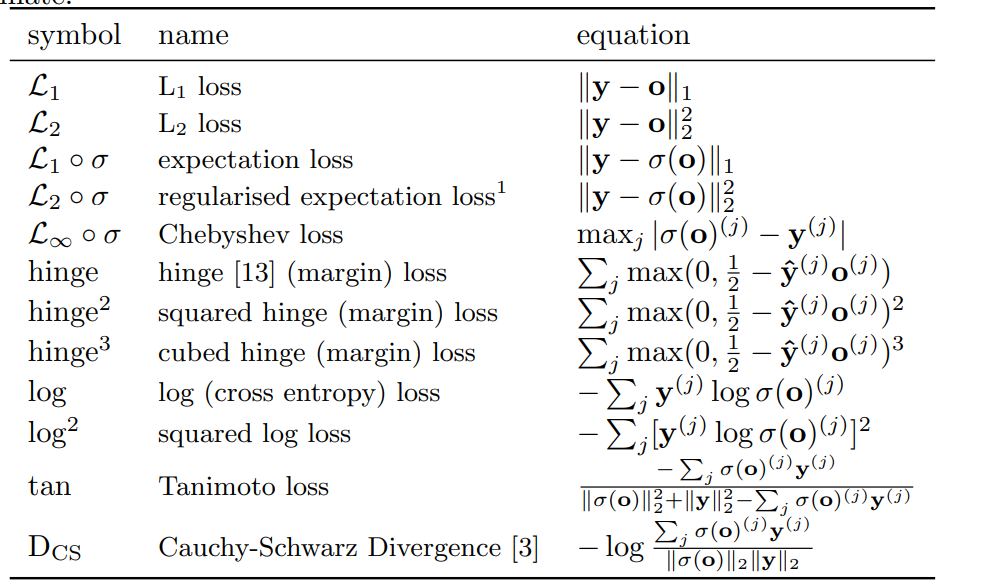
Janocha, K., & Czarnecki, W.M. (2017). On Loss Functions for Deep Neural Networks in Classification. ArXiv, abs/1702.05659.

### Наивный Байес

![](https://www.saedsayad.com/images/Bayes_rule.png)

In [ ]:
from sklearn.naive_bayes import GaussianNB

### К-ближайших соседей 
![](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.complex-narrative-xl.ts=1708637519167.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/complex_narrative/items/content_group/image)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

### Деревья решений
![](https://regenerativetoday.com/wp-content/uploads/2022/04/dt.png)
![](https://i.pinimg.com/originals/91/d3/31/91d3314ae9bc6525ed709b08c0214255.png)
![](https://www.researchgate.net/publication/347070799/figure/fig1/AS:970120969068545@1608306271088/Example-of-a-supervised-machine-learning-algorithm-a-decision-tree-Decision-trees-come.png)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## 2.1 Неодообучение, переобучение

![](https://docs.aws.amazon.com/images/machine-learning/latest/dg/images/mlconcepts_image5.png)

In [ ]:
sigma = 1 / (1 + e ^ (-XW))

In [ ]:
loss = sum((y_true - y_pred) ** 2) * 1 / n

In [ ]:
dloss / dW

grad(loss) - growth
-grad(loss) - downgrade

In [ ]:
W = W - (dloss / dW)

In [ ]:
y_pred = XW

In [ ]:
from sklearn.datasets import make_regression


X, y = make_regression(n_samples=30, n_features=1, noise=5, random_state=17)
plt.scatter(X, y);

In [ ]:
from sklearn.linear_model import SGDRegressor


estimator = SGDRegressor(max_iter=1)
estimator.fit(X, y)
y_pred = estimator.predict(X)

plt.scatter(X, y, label='true')
plt.scatter(X, y_pred, label='pred')
plt.legend();

In [ ]:
estimator = SGDRegressor()
estimator.fit(X, y)
y_pred = estimator.predict(X)

plt.scatter(X, y, label='true')
plt.scatter(X, y_pred, label='pred')
plt.legend();

In [ ]:
estimator.coef_

In [ ]:
y = w1 * x1 + w0

In [ ]:
y = w0 + w1 * x + w2 * x^2 + w3 * x^3 ... w9 * x^9

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


X_poly = PolynomialFeatures(degree=10).fit_transform(X)
estimator = SGDRegressor()
estimator.fit(X_poly, y)
y_pred = estimator.predict(X_poly)

plt.scatter(X, y, label='true')
plt.scatter(X, y_pred, label='pred')
plt.legend();

In [ ]:
import numpy as np


X_sample = np.arange(-2, 1.5, step=0.01)
X_poly = PolynomialFeatures(degree=10).fit_transform(X_sample.reshape(-1, 1))
y_pred = estimator.predict(X_poly)
plt.plot(y_pred, label='pred')
plt.legend();

In [ ]:
estimator.coef_

Большие веса означают переобучение модели

## 2.2.1 Метрики качества

#### Классификация

Confusion Matrix
![](https://plat.ai/wp-content/uploads/Table1-2.png.webp)
Basic
![](https://www.fticonsulting.com/insights/articles/-/media/ec68c768d8314ee9bd1d00109c2b603c.ashx)
![](https://developers.google.com/static/machine-learning/crash-course/images/AUCPredictionsRanked.svg)
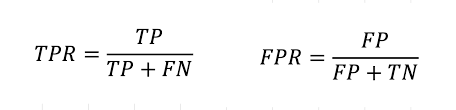
![](https://www.codecamp.ru/content/images/2021/08/read_roc2.png)

#### Регрессия

![](https://jonathan-sands.com/images/regression_metrics.png)
![](https://www.freecodecamp.org/news/content/images/2022/08/image.png)

## 2.2 Как бороться с переобучением (overfitting) модели?

### 2.2.1 Разделять выборку на тренировочную и тестовую

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/4_train-test-split.jpg)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

Обучаем модель на **тренировочной** выборке, смотрим метрики на **тестовой**

In [ ]:
from sklearn.metrics import mean_absolute_error


estimator = SGDRegressor()
estimator.fit(X_train, y_train)

y_pred_test = estimator.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
print(f"MAE Test = {mae:.2f}")

mae = mean_absolute_error(y_train, estimator.predict(X_train))
print(f"MAE Train = {mae:.2f}")

In [ ]:
estimator = SGDRegressor() 
estimator.fit(PolynomialFeatures(degree=10).fit_transform(X_train), y_train)

y_pred_test = estimator.predict(PolynomialFeatures(degree=10).fit_transform(X_test))

mae = mean_absolute_error(y_test, y_pred_test)
print(f"MAE test = {mae:.2f}")

mae = mean_absolute_error(y_train, estimator.predict(PolynomialFeatures(degree=10).fit_transform(X_train)))
print(f"MAE train = {mae:.2f}")

Высокая ошибка на тесте = переобучились  
Будем выбирать ту модель, которая на тесте показывает наименьшую ошибку

### Cross Validation для подбора гиперпараметров и выбора лучших моделей

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

**Обратите внимание!**  
Кросс валидацию проводят на тренировочном множестве

In [ ]:
X = np.arange(-10, 10, 0.01)
y = X ** 2 + X ** 4
plt.plot(X, y);

In [ ]:
y_new = y + np.random.normal(0, 200, y.shape)
plt.scatter(X, y_new, s=3);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=17)

In [ ]:
from sklearn.model_selection import cross_val_score


cross_val_score(SGDRegressor(), X_train.reshape(-1, 1), y_train, scoring='neg_mean_absolute_error')

In [ ]:
from sklearn.linear_model import Lasso


powers = range(1, 8)
for power in powers:
    X_power = PolynomialFeatures(degree=power).fit_transform(X_train.reshape(-1, 1))
    estimator = SGDRegressor()
    cv_scores = cross_val_score(estimator, X_power, y_train, scoring='neg_mean_absolute_error')
    print(f"Power = {power:2}, CV negative-MAE = {cv_scores.mean():.2f}")
    
    cv_scores = cross_val_score(Lasso(max_iter=50000), X_power, y_train, scoring='neg_mean_absolute_error')
    print(f"Lasso  --  Power = {power:2}, CV negative-MAE = {cv_scores.mean():.2f}")

In [ ]:
best_estimator = Lasso(max_iter=50000)
X_power = PolynomialFeatures(degree=4).fit_transform(X_train.reshape(-1, 1))
best_estimator.fit(X_power, y_train)

In [ ]:
y_pred_test = best_estimator.predict(PolynomialFeatures(degree=4).fit_transform(X_test.reshape(-1, 1)))

plt.scatter(X_test, y_test, alpha=0.5, label='true')
plt.scatter(X_test, y_pred_test, alpha=0.5, label='predict')
plt.legend();

### 2.2.2 Регуляризация

![](https://camo.githubusercontent.com/c6bad12af0242455193151eed8482efc3645188c78d37636c1d41eb9c58d1d10/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f3535302f312a2d4c79646851454479672d347979356847456a3577412e706e67)

In [ ]:
from sklearn.linear_model import Ridge, Lasso


X_power = PolynomialFeatures(degree=15).fit_transform(X_train.reshape(-1, 1))
X_power_test = PolynomialFeatures(degree=15).fit_transform(X_test.reshape(-1, 1))

lasso = Lasso(max_iter=500000)
lasso.fit(X_power, y_train)
lasso_predict = lasso.predict(X_power_test)

ridge = Ridge(max_iter=500000)
ridge.fit(X_power, y_train)
ridge_predict = ridge.predict(X_power_test)


plt.scatter(X_test, lasso_predict, alpha=0.5, label='Lasso')
plt.scatter(X_test, ridge_predict, alpha=0.5, label='Ridge')
plt.legend();

In [ ]:
lasso.coef_

In [ ]:
ridge.coef_

L1 зануляет веса, L2 не зануляет

![](https://www.researchgate.net/publication/281210149/figure/fig3/AS:668932620967964@1536497373944/a-The-L1-loss-function-blue-square-in-relationship-to-the-minimal-achievable-loss-b.png)

### 2.2.3 Упростить модель

# 2.3 Как бороться с недообученностью (underfitting)?
1. Увеличивать количество итераций, чтобы градиентный спуск достиг минимума
2. Усложнять модель

# 3. Предобработка признаков

## 3.1 Числовые переменные

### 3.1.1 Логарифмирование (либо применение других функций)

In [ ]:
DATA_URL = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(DATA_URL)

In [ ]:
data.head()

In [ ]:
data['charges'].hist();

In [ ]:
data['charges_log'] = np.log(data['charges'])
data['charges_log'].hist();

### 3.1.2 Масштабирование

MinMaxScaler
![](http://androidkt.com/wp-content/uploads/2020/10/Selection_060.png)  
---
StandartScaler
![](https://cdn-images-1.medium.com/max/370/1*Nlgc_wq2b-VfdawWX9MLWA.png)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


standart_scaled = StandardScaler().fit_transform(data['bmi'].values.reshape(-1, 1))
minmax_scaled = MinMaxScaler().fit_transform(data['bmi'].values.reshape(-1, 1))

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 3))

axes[0].scatter(range(len(standart_scaled)), data['bmi'].values.reshape(-1, 1))
axes[0].set_title("Original")

axes[1].scatter(range(len(standart_scaled)), standart_scaled)
axes[1].set_title("Standart scale")

axes[2].scatter(range(len(standart_scaled)), minmax_scaled)
axes[2].set_title("MinMax scale");

In [ ]:
from sklearn.preprocessing import QuantileTransformer

In [ ]:
quantiles = QuantileTransformer().fit_transform(data['bmi'].values.reshape(-1, 1))

In [ ]:
plt.scatter(range(len(standart_scaled)), quantiles);

In [ ]:
plt.hist(data['bmi']);

In [ ]:
plt.hist(quantiles);

## 3.2 Категориальные признаки

### 3.2.1 Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder


data['sex_LE'] = LabelEncoder().fit_transform(data['sex'])
data['smoker_LE'] = LabelEncoder().fit_transform(data['smoker'])
data['region_LE'] = LabelEncoder().fit_transform(data['region'])

In [ ]:
data.head()

In [ ]:
data['sex'].hist();

In [ ]:
data['region'].hist();

### 3.2.2 One Hot Encoding

![](https://datagy.io/wp-content/uploads/2022/01/One-Hot-Encoding-for-Scikit-Learn-in-Python-Explained-1024x576.png)

In [ ]:
from sklearn.preprocessing import OneHotEncoder


sparsed_matrix = OneHotEncoder().fit_transform(data['region'].values.reshape(-1, 1))
sparsed_matrix.toarray()

In [ ]:
dummy_data = pd.get_dummies(data[['sex', 'smoker', 'region']])
dummy_data.head()

### 3.2.3 Стараться в информативность кодирования

In [ ]:
data.groupby(['region']).mean()['charges_log'].to_dict()

In [ ]:
data['region_encoded'] = data['region'].replace(data.groupby(['region']).mean()['charges_log'].to_dict())

In [ ]:
data.head()

Для классификации можно вставлять величины, основанные на вероятностях события при данном классе  
Например WoE  
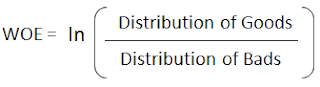

# 4. Работа с пропущенными значениями

## 4.1 Выкинуть наблюдения с прощенными значениями

In [ ]:
data.dropna(how='any')

## 4.2 Замена на что-либо
На что заменяют:
- Мода
- Среднее
- Максимум
- Минимум
- Отдельная категория вроде "Unknown" (для категориальных)

In [ ]:
data.fillna({"age": np.mean(data['age']), 
             "bmi": np.max(data['bmi']), 
             "smoker": "unknown", 
             "region": data['region'].mode().values[0]})